In [15]:
import analyze_dataset


train_filename = "/home/users/jseltmann/data/entailment_data_analysis/obj_in_caption/lemma_cap_not_seen/train.tsv"
test_filename = "/home/users/jseltmann/data/entailment_data_analysis/obj_in_caption/lemma_cap_not_seen/test.tsv"
cap_freq, obj_freq, tog_freq, syn_freq, ola_pos, ola_neg = analyze_dataset.load_data(train_filename,
                           "../../data/bert_classify_thereis_5caps_seed0/word_inds.pkl")

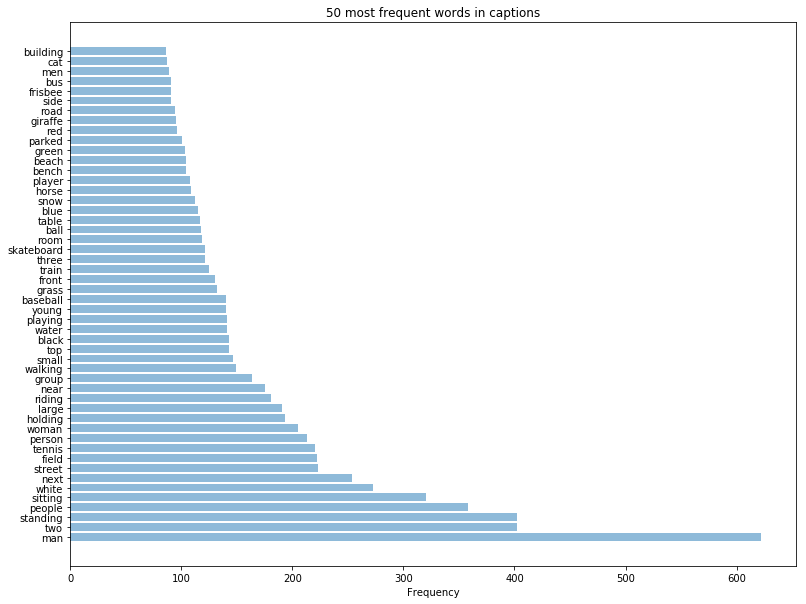

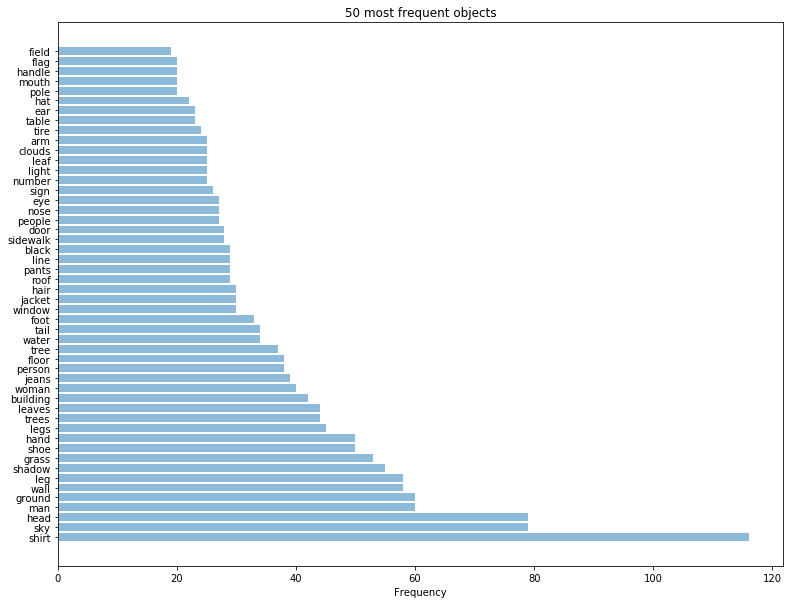

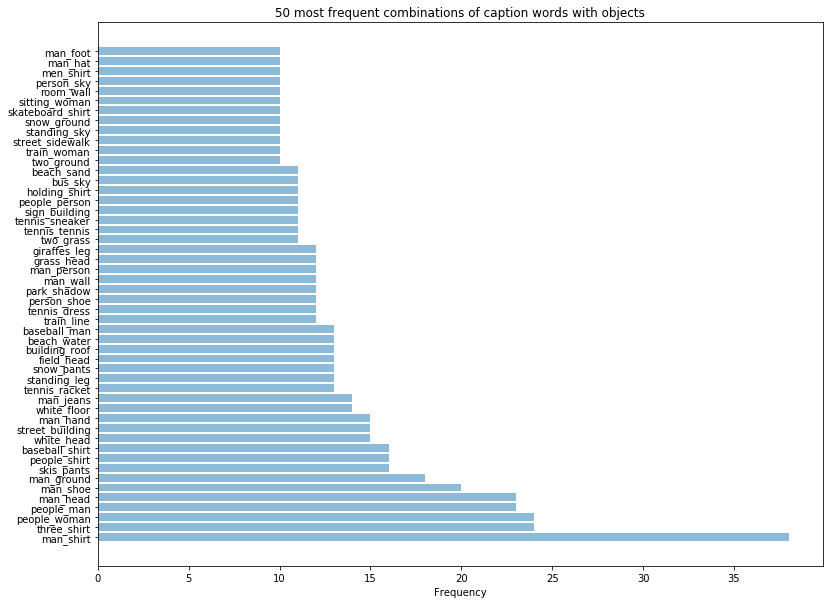

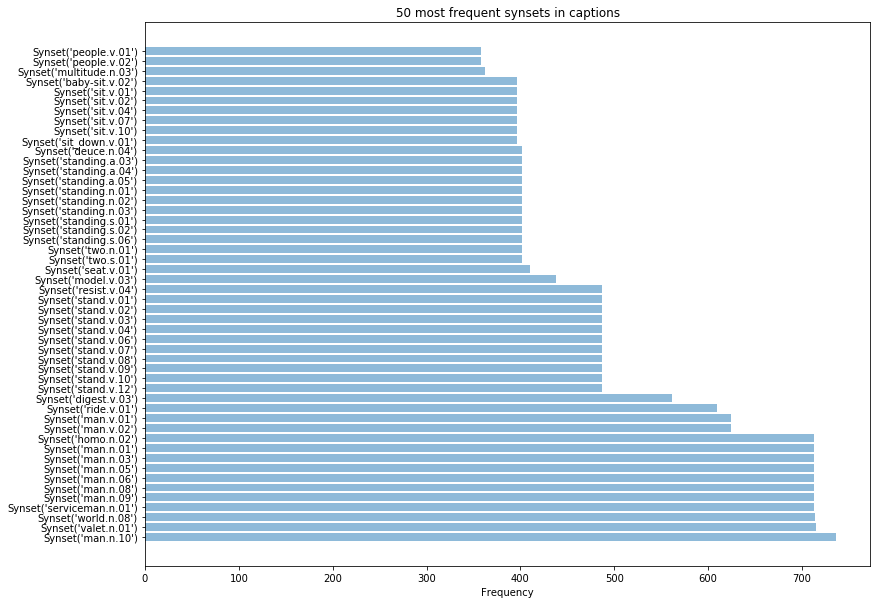

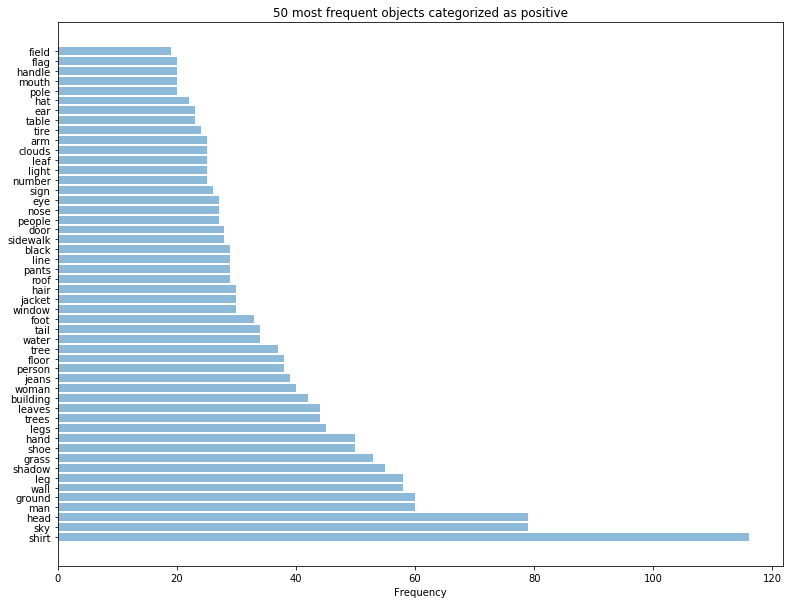

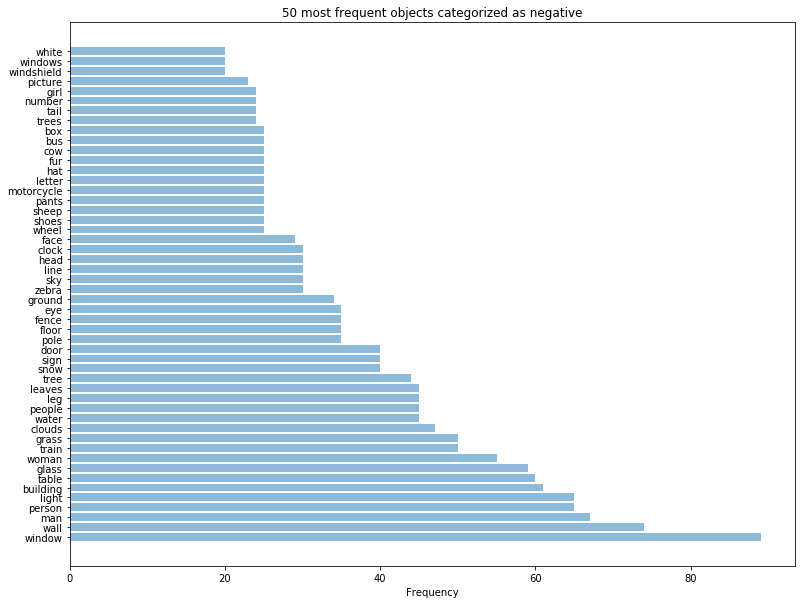

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar(lst, title):
    plt.figure(figsize=(13,10))
    objs = [str(b) for a, b in lst]
    vals = [a for a, b in lst]
    y_pos = np.arange(len(objs))
    plt.barh(y_pos, vals, align='center', alpha=0.5)
    plt.yticks(y_pos, objs)
    plt.xlabel('Frequency')
    plt.title(title)

plt.show()
    
plot_bar(cap_freq[:50], "50 most frequent words in captions")
plot_bar(obj_freq[:50], "50 most frequent objects")
plot_bar(tog_freq[:50], "50 most frequent combinations of caption words with objects")
plot_bar(syn_freq[:50], "50 most frequent synsets in captions")
plot_bar(ola_pos[:50], "50 most frequent objects categorized as positive")
plot_bar(ola_neg[:50], "50 most frequent objects categorized as negative")

In [11]:
# baseline model

objs = set([k for v, k in ola_pos])

pos = set()
neg = set()
equ = set()

for obj in objs:
    p = 0
    n = 0
    print("->", obj)
    for pv, po in ola_pos:
        if po == obj:
            p = pv
    for nv, no in ola_neg:
        if no == obj:
            n = nv
            
    if p > n:
        pos.add(obj)
    elif p < n:
        neg.add(obj)
    else:
        equ.add(obj)
        
print(len(pos))
print(len(neg))
print(len(equ))

-> white pillow
-> bear is walking
-> basket
-> monitor
-> wet
-> tarp
-> phone
-> time
-> uniform
-> palm tree
-> knife
-> man/helmet
-> catcher
-> alcove
-> wooden posts
-> tray
-> dishwasher
-> group
-> wrist
-> stick
-> horn
-> ry squirrel
-> ground
-> computer wires
-> tee shirt
-> sugar
-> rear lights
-> skateboarders
-> fruit
-> pen
-> cubby area
-> latch
-> horseback
-> child
-> pick
-> giraffe
-> stool
-> red graffiti
-> sunglasses
-> trainer
-> column
-> flag
-> products
-> boundary
-> binder
-> horse
-> grip
-> tennis match
-> bowl
-> glasses
-> mantle
-> edge
-> leaf
-> jar
-> line
-> rag
-> engines
-> tile
-> curtains
-> soap
-> ski lodge
-> cord
-> mane
-> jacket
-> crouching/baseball umpire
-> vent
-> lines
-> mantel
-> field
-> moving
-> archway
-> brush
-> string
-> chair whole
-> towel
-> city
-> stars
-> laptop keyboard
-> waves
-> blanket
-> rocks
-> letter
-> litter
-> cup
-> dirt
-> right ear
-> roadside
-> trams
-> snack bags
-> light
-> visor
-> bracelet
-> tarm

-> white pants
-> partofaman
-> sky
-> lettering
-> luggage
-> floor trim
-> tail
-> bar
-> reigns
-> window box
-> pants
-> black
-> sectional
-> beard
-> toe
-> shelf
-> carpet
-> umpire
-> black keys
-> evergreen
-> snout
-> white fridge
-> rays
-> cushion
-> shirt
-> headphones
-> men
-> shore
-> grey
-> bat
285
329
208


In [42]:
# evaluate
import random
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
nltk.download('stopwords')
import torch
import torch.nn.utils.rnn as rnn
import nltk
import csv
import pickle
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer


tp = 0
tn = 0
fp = 0
fn = 0

with open(test_filename) as train_file:
        train_reader = csv.reader(train_file, delimiter='\t', quotechar=None, escapechar="\\")
        for i, line in enumerate(train_reader):
            if i == 0 or len(line) < 4:
                continue
            
            caption = line[1].lower()
            obj = line[2].lower()
            label = line[3]
            
            pred = False
            if obj in pos:
                pred = True
            elif obj in neg:
                pred = False
            else:
                pred = bool(random.getrandbits(1))
                
            corr = True if label == "True" else False
            
            if corr == True and pred == True:
                tp += 1
            elif corr == True and pred == False:
                fn += 1
            elif corr == False and pred == True:
                fp += 1
            elif corr == False and pred == False:
                tn += 1
                
precision = tp / (tp + fp)
recall    = tp / (tp + fn)

print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

print("Precision:", precision)
print("Recall:", recall)

TP: 31331
TN: 42946
FP: 28741
FN: 31926
Precision: 0.5215574643760821
Recall: 0.49529696318194033


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/users/ortland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
